In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/car_data.csv')

In [5]:
df.shape

(804, 12)

In [6]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [7]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [8]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [9]:
df = df.drop_duplicates()
df.shape

(804, 12)

In [10]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [11]:
iqr = df.Mileage.quantile(0.75) - df.Mileage.quantile(0.25)
iqr

10589.5

In [12]:
upper_threshold = df.Mileage.quantile(0.75) + (1.5 * iqr)
upper_threshold

41097.25

In [13]:
lower_threshold = df.Mileage.quantile(0.25) - (1.5 * iqr)
lower_threshold

-1260.75

In [14]:
df.Mileage = df.Mileage.clip(-1260.75, 41097.25)

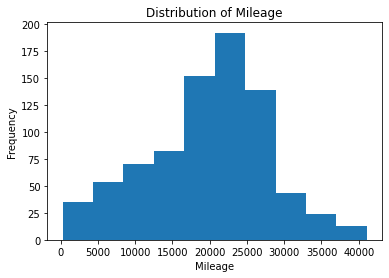

In [15]:
# Mileage
plt.hist(df['Mileage'], bins = 10)
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

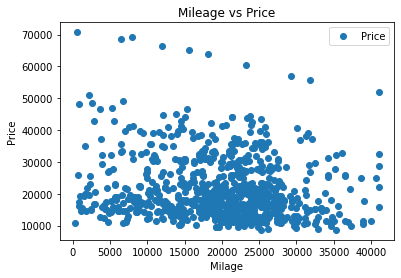

In [16]:
df.plot(x = 'Mileage', y = 'Price', style = 'o')
plt.title('Mileage vs Price')
plt.xlabel('Milage')
plt.ylabel('Price')
plt.show()

In [17]:
df[['Mileage', 'Price']].corr()

,Mileage,Price
Mileage,1.000000,-0.146283
Price,-0.146283,1.000000


In [18]:
X = df[['Mileage']].values
y = df['Price'].values

In [19]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 50)

In [20]:
X_train.shape, X_test.shape

((562, 1), (242, 1))

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [23]:
print(regressor.intercept_)

21615.782746408076


In [24]:
print(regressor.coef_)

[-1854.05086211]


**1. Find the linear regression equation for mileage vs price.**

In [25]:
print('Linear Regression Equation: y = {:.4f}* x + {:.4f}'.format(regressor.coef_[0], regressor.intercept_))

Linear Regression Equation: y = -1854.0509* x + 21615.7827


In [26]:
y_pred = regressor.predict(X_test_scaled)

In [27]:
df1 = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
df1

,Actual,Predicted
0,18311.756302,22124.519142
1,12383.402811,20392.964480
2,10546.782745,17261.047899
3,22470.358430,20947.525051
4,30251.018417,19827.961916
...,...,...
237,21646.116924,21643.052514
238,19751.041431,21427.856680
239,14546.884814,18507.730936
240,20952.217802,21507.760619


**3. Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)**


In [28]:
print('R2 Score : ',regressor.score(X_test_scaled,y_test))

R2 Score :  -0.029917303750242707


**2. Chart the original data and the equation on the chart.**


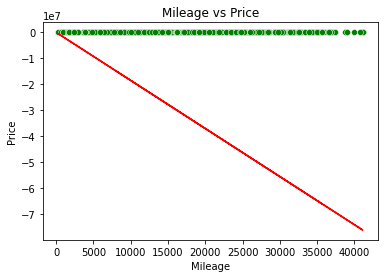

In [29]:
sns.scatterplot(x = df['Mileage'], y = df['Price'], data = df, color = 'green')
plt.plot(X, regressor.predict(X), color = 'red')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()


In [30]:
# Plotting the distrbution of each features
# Plotting the line graph of feature vs the traget variable
# Finding the correlation of continuous feature vs the target variable

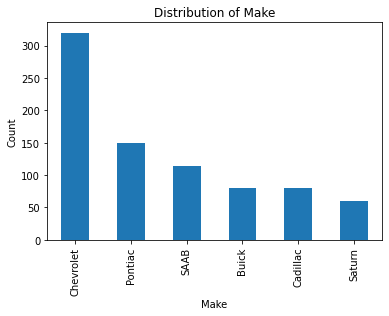

In [31]:
df['Make'].value_counts().plot(kind = 'bar')
plt.title('Distribution of Make')
plt.xlabel('Make')
plt.ylabel('Count')
plt.show()

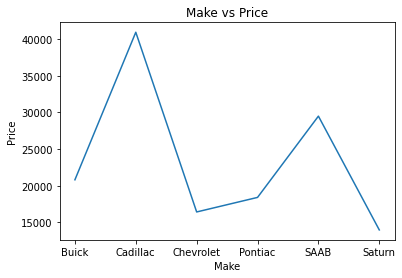

In [32]:
df.groupby('Make')['Price'].mean().plot()
plt.title('Make vs Price')
plt.xlabel('Make')
plt.ylabel('Price')
plt.show()

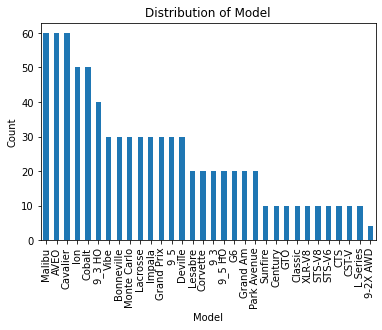

In [33]:
df['Model'].value_counts().plot(kind = 'bar')
plt.title('Distribution of Model')
plt.xlabel('Model')
plt.ylabel('Count')
plt.show()

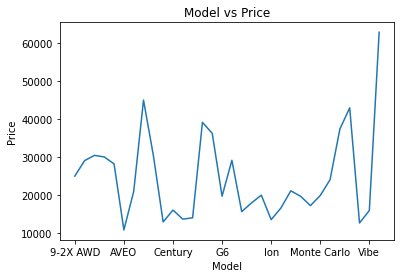

In [34]:
# Model vs Price
df.groupby('Model')['Price'].mean().plot()
plt.title('Model vs Price')
plt.xlabel('Model')
plt.ylabel('Price')
plt.show()

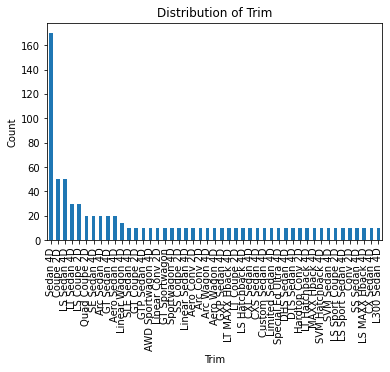

In [35]:
df['Trim'].value_counts().plot(kind = 'bar')
plt.title('Distribution of Trim')
plt.xlabel('Trim')
plt.ylabel('Count')
plt.show()

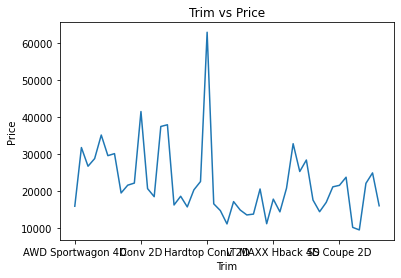

In [36]:
# Trim vs Price
df.groupby('Trim')['Price'].mean().plot()
plt.title('Trim vs Price')
plt.xlabel('Trim')
plt.ylabel('Price')
plt.show()

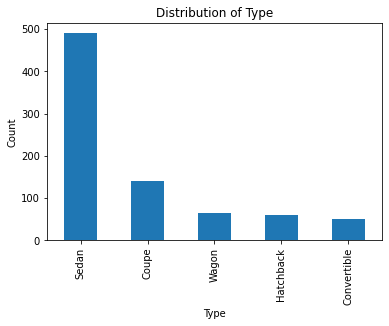

In [37]:
# Type
df['Type'].value_counts().plot(kind = 'bar')
plt.title('Distribution of Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

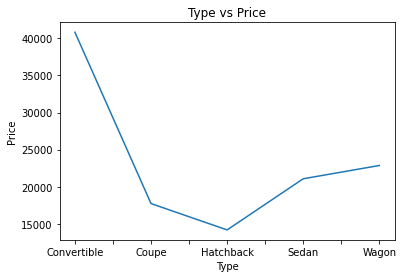

In [38]:
# Type vs Price
df.groupby('Type')['Price'].mean().plot()
plt.title('Type vs Price')
plt.xlabel('Type')
plt.ylabel('Price')
plt.show()

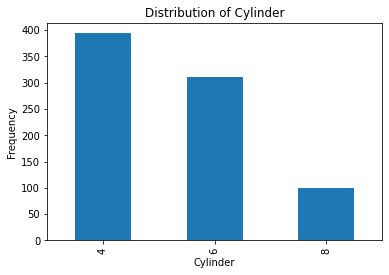

In [39]:
# Cylinder
df['Cylinder'].value_counts().plot(kind = 'bar')
plt.title('Distribution of Cylinder')
plt.xlabel('Cylinder')
plt.ylabel('Frequency')
plt.show()

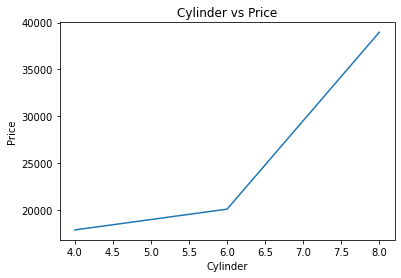

In [40]:
# Cylinder vs Price
df.groupby('Cylinder')['Price'].mean().plot()
plt.title('Cylinder vs Price')
plt.xlabel('Cylinder')
plt.ylabel('Price')
plt.show()

In [41]:
df[['Cylinder', 'Price']].corr()

,Cylinder,Price
Cylinder,1.000000,0.569086
Price,0.569086,1.000000


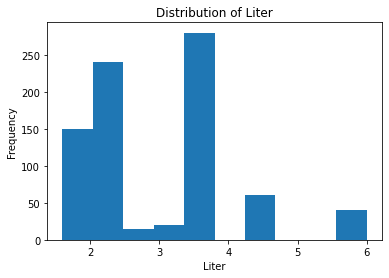

In [42]:
# Liter
plt.hist(df['Liter'], bins = 10)
plt.title('Distribution of Liter')
plt.xlabel('Liter')
plt.ylabel('Frequency')
plt.show()


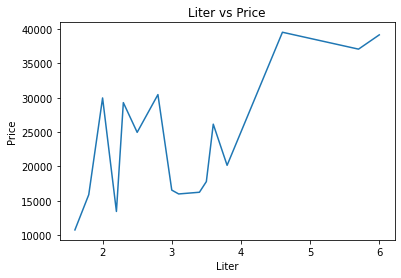

In [43]:
# Liter vs Price
df.groupby('Liter')['Price'].mean().plot()
plt.title('Liter vs Price')
plt.xlabel('Liter')
plt.ylabel('Price')
plt.show()

In [44]:
df[['Liter', 'Price']].corr()

,Liter,Price
Liter,1.000000,0.558146
Price,0.558146,1.000000


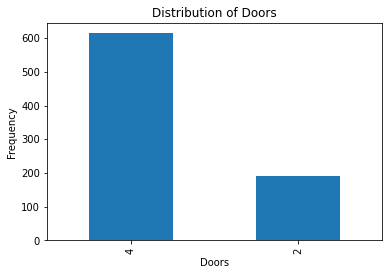

In [45]:
# Doors
df['Doors'].value_counts().plot(kind = 'bar')
plt.title('Distribution of Doors')
plt.xlabel('Doors')
plt.ylabel('Frequency')
plt.show()

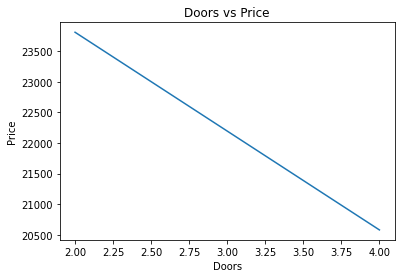

In [46]:
# Doors vs Price
df.groupby('Doors')['Price'].mean().plot()
plt.title('Doors vs Price')
plt.xlabel('Doors')
plt.ylabel('Price')
plt.show()

In [47]:
df[['Doors', 'Price']].corr()

,Doors,Price
Doors,1.00000,-0.13875
Price,-0.13875,1.00000


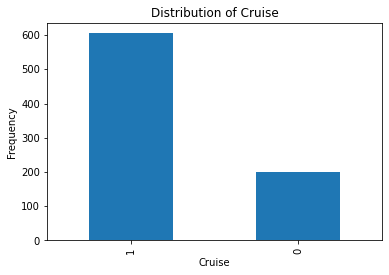

In [48]:
# Cruise
df['Cruise'].value_counts().plot(kind = 'bar')
plt.title('Distribution of Cruise')
plt.xlabel('Cruise')
plt.ylabel('Frequency')
plt.show()

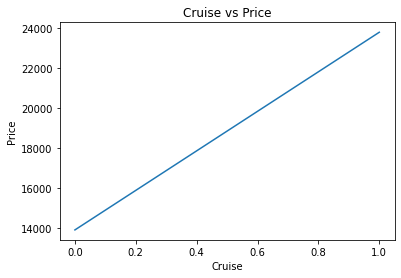

In [49]:
# Cruise vs Price
df.groupby('Cruise')['Price'].mean().plot()
plt.title('Cruise vs Price')
plt.xlabel('Cruise')
plt.ylabel('Price')
plt.show()

In [50]:
df[['Sound', 'Price']].corr()

,Sound,Price
Sound,1.000000,-0.124348
Price,-0.124348,1.000000


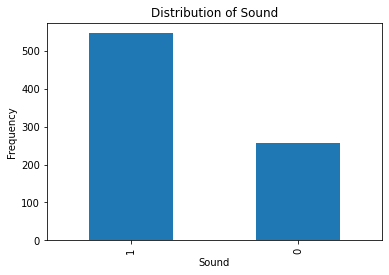

In [51]:
# Sound
df['Sound'].value_counts().plot(kind = 'bar')
plt.title('Distribution of Sound')
plt.xlabel('Sound')
plt.ylabel('Frequency')
plt.show()

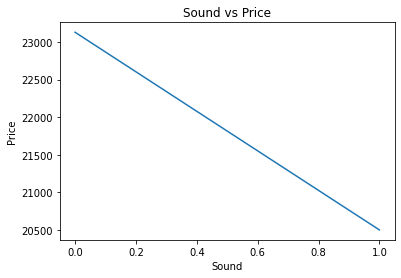

In [52]:
# Sound vs Price
df.groupby('Sound')['Price'].mean().plot()
plt.title('Sound vs Price')
plt.xlabel('Sound')
plt.ylabel('Price')
plt.show()

In [53]:
df[['Sound', 'Price']].corr()

,Sound,Price
Sound,1.000000,-0.124348
Price,-0.124348,1.000000


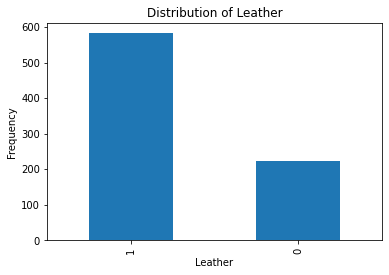

In [54]:
# Leather
df['Leather'].value_counts().plot(kind = 'bar')
plt.title('Distribution of Leather')
plt.xlabel('Leather')
plt.ylabel('Frequency')
plt.show()

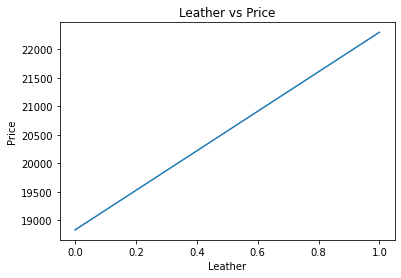

In [55]:
# Leather vs Price
df.groupby('Leather')['Price'].mean().plot()
plt.title('Leather vs Price')
plt.xlabel('Leather')
plt.ylabel('Price')
plt.show()

In [56]:
df[['Leather', 'Price']].corr()

,Leather,Price
Leather,1.000000,0.157197
Price,0.157197,1.000000


In [57]:
df.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.146283,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.146283,1.000000,-0.028069,-0.016878,-0.015384,0.023516,-0.025447,-0.000876
Cylinder,0.569086,-0.028069,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.016878,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.015384,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.023516,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.025447,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,-0.000876,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


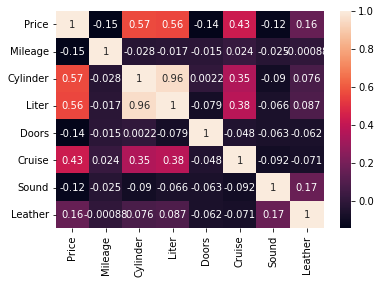

In [58]:
sns.heatmap(df.corr(), annot = True)
plt.show()

In [59]:
# From the above table and heatmap, we can infer that only CYLINDER, LITER and CRUISE have positive correlation with the target variable PRICE. Thus these are the important features for building  the model.

## TASK 2

In [60]:
X = df[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']].values
y = df['Price'].values

In [61]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 285)

In [62]:
X_train.shape, X_test.shape

((562, 7), (242, 7))

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [65]:
print(regressor.intercept_)

21742.158389192442


In [66]:
print(regressor.coef_)

[-1540.0301315   6063.21969251 -1376.12506698 -1601.76858802
  2485.74163113 -1141.43363286  1463.12581626]


In [67]:
coef = pd.DataFrame(regressor.coef_, ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'], columns = ['coefficient'])
coef

,coefficient
Mileage,-1540.030132
Cylinder,6063.219693
Liter,-1376.125067
Doors,-1601.768588
Cruise,2485.741631
Sound,-1141.433633
Leather,1463.125816


**1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.**

In [68]:
print('Linear Regression Equation: y = {:.4f}*Mileage + {:.4f}*Cylinder + {:.4f}*Liter + {:.4f}*Doors + {:.4f}*Cruise + {:.4f}*Sound + {:.4f}*Leather + {:.4f}'
      .format(regressor.coef_[0], regressor.coef_[1], regressor.coef_[2], regressor.coef_[3], regressor.coef_[4], regressor.coef_[5], regressor.coef_[6],regressor.intercept_))

Linear Regression Equation: y = -1540.0301*Mileage + 6063.2197*Cylinder + -1376.1251*Liter + -1601.7686*Doors + 2485.7416*Cruise + -1141.4336*Sound + 1463.1258*Leather + 21742.1584


In [69]:
y_pred = regressor.predict(X_test_scaled)

In [70]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,15554.283129,21709.427012
1,9789.037676,11710.210453
2,17463.046081,26281.988286
3,11137.045655,11806.343299
4,11343.054010,18258.250594
...,...,...
237,12045.920705,15426.992277
238,16536.743875,23826.004705
239,31849.307947,20454.100814
240,18490.983029,27589.434152


**2. Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)**

In [71]:
print('R2 Score : ', regressor.score(X_test_scaled,y_test))

R2 Score :  0.3989678532969194


**3. Find the combination of the factors that is the best predictor for price.**

In [72]:
from itertools import combinations

In [73]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

### **2** **Combinations**

In [74]:
for i in list(combinations(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],2)):
  # feature and target
  X = df[list(i)].values
  y = df['Price'].values
  
  # splitting
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 52)
  
  # scaling
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  
  # model
  regressor = LinearRegression() 
  regressor.fit(X_train_scaled, y_train)
  
  # print('Co-efficient :', regressor.coef_ , 'Intercept :', regressor.intercept_)
  
  # Predict
  y_pred = regressor.predict(X_test_scaled)
 
  # Evaluation
  print(i, 'R2 Score : ', regressor.score(X_test_scaled,y_test))

('Mileage', 'Cylinder') R2 Score :  0.2682309079478623
('Mileage', 'Liter') R2 Score :  0.2668392215561721
('Mileage', 'Doors') R2 Score :  0.0169685137757678
('Mileage', 'Cruise') R2 Score :  0.1889587764115911
('Mileage', 'Sound') R2 Score :  -0.03798714260219915
('Mileage', 'Leather') R2 Score :  0.0195913701411794
('Cylinder', 'Liter') R2 Score :  0.26355067476227845
('Cylinder', 'Doors') R2 Score :  0.2930608769074492
('Cylinder', 'Cruise') R2 Score :  0.3128932753783562
('Cylinder', 'Sound') R2 Score :  0.2585390346757652
('Cylinder', 'Leather') R2 Score :  0.28639488711168626
('Liter', 'Doors') R2 Score :  0.2774425540033407
('Liter', 'Cruise') R2 Score :  0.3066595577034521
('Liter', 'Sound') R2 Score :  0.2582828475081378
('Liter', 'Leather') R2 Score :  0.28330055045865643
('Doors', 'Cruise') R2 Score :  0.2096989797484402
('Doors', 'Sound') R2 Score :  0.011971406700320486
('Doors', 'Leather') R2 Score :  0.04578868657478452
('Cruise', 'Sound') R2 Score :  0.1704364785535205

Of all the above combinations of 2 features, we infer that the combination of Cyliner and Cruise has the highest R2 score of 0.3128

### **3** **Combinations**

In [75]:
for i in list(combinations(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],3)):
  # feature and target
  X = df[list(i)].values
  y = df['Price'].values
 
  # splitting
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 52)
  
  # scaling
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  
  # model
  regressor = LinearRegression() 
  regressor.fit(X_train_scaled, y_train)
  
  # print('Co-efficient :', regressor.coef_ , 'Intercept :', regressor.intercept_)
  
  # Predict
  y_pred = regressor.predict(X_test_scaled)
 
  # Evaluation
  print(i, 'R2 Score : ', regressor.score(X_test_scaled,y_test))

('Mileage', 'Cylinder', 'Liter') R2 Score :  0.272839346113791
('Mileage', 'Cylinder', 'Doors') R2 Score :  0.3016137048312425
('Mileage', 'Cylinder', 'Cruise') R2 Score :  0.32357817258096755
('Mileage', 'Cylinder', 'Sound') R2 Score :  0.2641375805170513
('Mileage', 'Cylinder', 'Leather') R2 Score :  0.2966781744465473
('Mileage', 'Liter', 'Doors') R2 Score :  0.2849666123572333
('Mileage', 'Liter', 'Cruise') R2 Score :  0.3157221081364854
('Mileage', 'Liter', 'Sound') R2 Score :  0.2616529787128854
('Mileage', 'Liter', 'Leather') R2 Score :  0.29235217482703724
('Mileage', 'Doors', 'Cruise') R2 Score :  0.21218103718742753
('Mileage', 'Doors', 'Sound') R2 Score :  0.0031032826955871284
('Mileage', 'Doors', 'Leather') R2 Score :  0.05102998048833851
('Mileage', 'Cruise', 'Sound') R2 Score :  0.16717974972778293
('Mileage', 'Cruise', 'Leather') R2 Score :  0.24074925539649616
('Mileage', 'Sound', 'Leather') R2 Score :  0.00022877586777136916
('Cylinder', 'Liter', 'Doors') R2 Score :  

Of all the above combinations of 3 features, we infer that the combination of Cyliner, Cruise and Leather has the highest R2 score of 0.3504

In [76]:
for i in list(combinations(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],4)):
  # feature and target
  X = df[list(i)].values
  y = df['Price'].values
  # split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 52)
  # scale
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  # model
  regressor = LinearRegression() 
  regressor.fit(X_train_scaled, y_train)
  # print('Co-efficient :', regressor.coef_ , 'Intercept :', regressor.intercept_)
  # Predict
  y_pred = regressor.predict(X_test_scaled)
  # Evaluation
  print(i, 'R2 Score : ', regressor.score(X_test_scaled,y_test))

('Mileage', 'Cylinder', 'Liter', 'Doors') R2 Score :  0.3018431407832973
('Mileage', 'Cylinder', 'Liter', 'Cruise') R2 Score :  0.32407946993613157
('Mileage', 'Cylinder', 'Liter', 'Sound') R2 Score :  0.2691593478880949
('Mileage', 'Cylinder', 'Liter', 'Leather') R2 Score :  0.300124344277907
('Mileage', 'Cylinder', 'Doors', 'Cruise') R2 Score :  0.34948907402052287
('Mileage', 'Cylinder', 'Doors', 'Sound') R2 Score :  0.30111004542333053
('Mileage', 'Cylinder', 'Doors', 'Leather') R2 Score :  0.32623731794292166
('Mileage', 'Cylinder', 'Cruise', 'Sound') R2 Score :  0.31754836064512215
('Mileage', 'Cylinder', 'Cruise', 'Leather') R2 Score :  0.3641910165823684
('Mileage', 'Cylinder', 'Sound', 'Leather') R2 Score :  0.29772248271244073
('Mileage', 'Liter', 'Doors', 'Cruise') R2 Score :  0.3312019651230599
('Mileage', 'Liter', 'Doors', 'Sound') R2 Score :  0.28269560977120967
('Mileage', 'Liter', 'Doors', 'Leather') R2 Score :  0.30820598049557646
('Mileage', 'Liter', 'Cruise', 'Sound'

Of all the above combinations of 4 features, we infer that the combination of Liter, Doors, Cruise, Leather has the highest R2 score of 0.35386

In [77]:
for i in list(combinations(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],5)):
  # feature and target
  X = df[list(i)].values
  y = df['Price'].values
  # split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 52)
  # scale
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  # model
  regressor = LinearRegression() 
  regressor.fit(X_train_scaled, y_train)
  # print('Co-efficient :', regressor.coef_ , 'Intercept :', regressor.intercept_)
  # Predict
  y_pred = regressor.predict(X_test_scaled)
  # Evaluation
  print(i, 'R2 - SCORE : ', regressor.score(X_test_scaled,y_test))

('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise') R2 - SCORE :  0.3495981245399231
('Mileage', 'Cylinder', 'Liter', 'Doors', 'Sound') R2 - SCORE :  0.30148691824764495
('Mileage', 'Cylinder', 'Liter', 'Doors', 'Leather') R2 - SCORE :  0.32634223024107534
('Mileage', 'Cylinder', 'Liter', 'Cruise', 'Sound') R2 - SCORE :  0.3182351365356988
('Mileage', 'Cylinder', 'Liter', 'Cruise', 'Leather') R2 - SCORE :  0.3642667910566617
('Mileage', 'Cylinder', 'Liter', 'Sound', 'Leather') R2 - SCORE :  0.30158340006733886
('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound') R2 - SCORE :  0.34628031372799994
('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Leather') R2 - SCORE :  0.3860178262863857
('Mileage', 'Cylinder', 'Doors', 'Sound', 'Leather') R2 - SCORE :  0.33156125682771953
('Mileage', 'Cylinder', 'Cruise', 'Sound', 'Leather') R2 - SCORE :  0.36109441886023064
('Mileage', 'Liter', 'Doors', 'Cruise', 'Sound') R2 - SCORE :  0.32600670231732154
('Mileage', 'Liter', 'Doors', 'Cruise', 'Leather') R2

Of all the above combinations of 5 features, we infer that the combination of Mileage, Cylinder, Doors, Cruise, Leather has the highest R2 score of 0.3860

In [78]:
for i in list(combinations(['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],6)):
  # feature and target
  X = df[list(i)].values
  y = df['Price'].values
  # split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 52)
  # scale
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  # model
  regressor = LinearRegression() 
  regressor.fit(X_train_scaled, y_train)
  # print('Co-efficient :', regressor.coef_ , 'Intercept :', regressor.intercept_)
  # Predict
  y_pred = regressor.predict(X_test_scaled)
  # Evaluation
  print(i, 'R2 - SCORE : ', regressor.score(X_test_scaled,y_test))

('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound') R2 - SCORE :  0.34659377296216276
('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Leather') R2 - SCORE :  0.38684402479288527
('Mileage', 'Cylinder', 'Liter', 'Doors', 'Sound', 'Leather') R2 - SCORE :  0.3317205681189134
('Mileage', 'Cylinder', 'Liter', 'Cruise', 'Sound', 'Leather') R2 - SCORE :  0.36123589563726377
('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather') R2 - SCORE :  0.38656713509519935
('Mileage', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather') R2 - SCORE :  0.3643915971826487
('Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather') R2 - SCORE :  0.3767724271166658


Of all the above combinations of 6 features, we infer that the combination of Mileage, Cylinder, Liter, Doors, Cruise, Leather has the highest R2 score of 0.3868

**From all the above set of combinations, we can conclude that as the number of features increases, the R2 score also increases**

### **TASK** **3**

**1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.**


In [79]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832.0,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


The features: Make, Model, Trim, Type are categorical in nature, so we are going to perform One hot encoding and find the R2 scores.

In [80]:
df['Make'].value_counts()

Chevrolet    320
Pontiac      150
SAAB         114
Buick         80
Cadillac      80
Saturn        60
Name: Make, dtype: int64

In [81]:
df['Model'].value_counts()

Malibu         60
AVEO           60
Cavalier       60
Ion            50
Cobalt         50
9_3 HO         40
Vibe           30
Bonneville     30
Monte Carlo    30
Lacrosse       30
Impala         30
Grand Prix     30
9_5            30
Deville        30
Lesabre        20
Corvette       20
9_3            20
9_5 HO         20
G6             20
Grand Am       20
Park Avenue    20
Sunfire        10
Century        10
GTO            10
Classic        10
XLR-V8         10
STS-V8         10
STS-V6         10
CTS            10
CST-V          10
L Series       10
9-2X AWD        4
Name: Model, dtype: int64

In [82]:
df['Trim'].value_counts()

Sedan 4D               170
Coupe 2D                50
LS Sedan 4D             50
LT Sedan 4D             30
LS Coupe 2D             30
Quad Coupe 2D           20
SE Sedan 4D             20
Arc Sedan 4D            20
GT Sedan 4D             20
Aero Sedan 4D           20
Linear Wagon 4D         14
SLE Sedan 4D            10
GT Coupe 2D             10
GTP Sedan 4D            10
AWD Sportwagon 4D       10
Linear Conv 2D          10
GT Sportwagon           10
Sportwagon 4D           10
SS Coupe 2D             10
Linear Sedan 4D         10
Aero Conv 2D            10
Arc Conv 2D             10
Arc Wagon 4D            10
Aero Wagon 4D           10
GXP Sedan 4D            10
LT MAXX Hback 4D        10
LT Coupe 2D             10
LS Hatchback 4D         10
CXL Sedan 4D            10
CXS Sedan 4D            10
Custom Sedan 4D         10
Limited Sedan 4D        10
Special Ed Ultra 4D     10
DHS Sedan 4D            10
DTS Sedan 4D            10
Hardtop Conv 2D         10
LT Hatchback 4D         10
M

In [83]:
df['Type'].value_counts()

Sedan          490
Coupe          140
Wagon           64
Hatchback       60
Convertible     50
Name: Type, dtype: int64

In [84]:
# Now we are going to One hot encode by using: get dummies and find the combinations of features.

MAKE

In [85]:
df1 = pd.get_dummies(df['Make'])

In [86]:
df1.head()

,Buick,Cadillac,Chevrolet,Pontiac,SAAB,Saturn
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


In [87]:
for i in list(combinations(['Chevrolet', 'Pontiac', 'SAAB', 'Buick', 'Cadillac', 'Saturn'],2)):
  # feature and target
  X = df1[list(i)].values
  y = df['Price'].values
 
  # splitting
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 285)
  
  # scaling
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)
 
  # model
  regressor = LinearRegression() 
  regressor.fit(X_train_scaled, y_train)
  
  # print('Co-efficient :', regressor.coef_ , 'Intercept :', regressor.intercept_)
  
  # Predict
  y_pred = regressor.predict(X_test_scaled)
  
  # Evaluation
  print(i, 'R2 score : ', regressor.score(X_test_scaled,y_test))

('Chevrolet', 'Pontiac') R2 score :  0.3441838585500796
('Chevrolet', 'SAAB') R2 score :  0.30503279750684575
('Chevrolet', 'Buick') R2 score :  0.270626162644382
('Chevrolet', 'Cadillac') R2 score :  0.531951075318669
('Chevrolet', 'Saturn') R2 score :  0.3751111103403466
('Pontiac', 'SAAB') R2 score :  0.12146823129567041
('Pontiac', 'Buick') R2 score :  -0.03844828289107949
('Pontiac', 'Cadillac') R2 score :  0.4153618368467392
('Pontiac', 'Saturn') R2 score :  0.009037861021896743
('SAAB', 'Buick') R2 score :  0.13957227269676464
('SAAB', 'Cadillac') R2 score :  0.6697958116094151
('SAAB', 'Saturn') R2 score :  0.15703544472606146
('Buick', 'Cadillac') R2 score :  0.42858202104740806
('Buick', 'Saturn') R2 score :  0.012115807316348759
('Cadillac', 'Saturn') R2 score :  0.43859827639603344


In [88]:
# A combination of Chevrolet and Cadillac has the highest R2 score of 0.5319

In [89]:
for i in list(combinations(['Chevrolet', 'Pontiac', 'SAAB', 'Buick', 'Cadillac', 'Saturn'],3)):
  # feature and target
  X = df1[list(i)].values
  y = df['Price'].values
 
  # split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 285)
 
  # scale
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  
  # model
  regressor = LinearRegression() 
  regressor.fit(X_train_scaled, y_train)
 
  # print('Co-efficient :', regressor.coef_ , 'Intercept :', regressor.intercept_)
 
  # Predict
  y_pred = regressor.predict(X_test_scaled)
 
  # Evaluation
  print(i, 'R2 Score : ', regressor.score(X_test_scaled,y_test))

('Chevrolet', 'Pontiac', 'SAAB') R2 Score :  0.35724580062723643
('Chevrolet', 'Pontiac', 'Buick') R2 Score :  0.3773697710860223
('Chevrolet', 'Pontiac', 'Cadillac') R2 Score :  0.5582139942102149
('Chevrolet', 'Pontiac', 'Saturn') R2 Score :  0.5397930414021572
('Chevrolet', 'SAAB', 'Buick') R2 Score :  0.3100060893129901
('Chevrolet', 'SAAB', 'Cadillac') R2 Score :  0.6834997178137052
('Chevrolet', 'SAAB', 'Saturn') R2 Score :  0.39492551387665287
('Chevrolet', 'Buick', 'Cadillac') R2 Score :  0.5327250548693268
('Chevrolet', 'Buick', 'Saturn') R2 Score :  0.41013473751712703
('Chevrolet', 'Cadillac', 'Saturn') R2 Score :  0.5931734200152428
('Pontiac', 'SAAB', 'Buick') R2 Score :  0.11874542854046288
('Pontiac', 'SAAB', 'Cadillac') R2 Score :  0.6777169058867842
('Pontiac', 'SAAB', 'Saturn') R2 Score :  0.13730234185927703
('Pontiac', 'Buick', 'Cadillac') R2 Score :  0.4210451078032754
('Pontiac', 'Buick', 'Saturn') R2 Score :  -0.002770816153458311
('Pontiac', 'Cadillac', 'Saturn'

In [90]:
# A combination of 'SAAB', 'Buick' and 'Cadillac has the highest R2 score of 0.6930

In [91]:
for i in list(combinations(['Chevrolet', 'Pontiac', 'SAAB', 'Buick', 'Cadillac', 'Saturn'],4)):
  # feature and target
  X = df1[list(i)].values
  y = df['Price'].values
  
  # split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 285)
 
  # scale
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  
  # model
  regressor = LinearRegression() 
  regressor.fit(X_train_scaled, y_train)
  
  # print('Co-efficient :', regressor.coef_ , 'Intercept :', regressor.intercept_)
  
  # Predict
  y_pred = regressor.predict(X_test_scaled)
  
  # Evaluation
  print(i, 'R2 Score : ', regressor.score(X_test_scaled,y_test))

('Chevrolet', 'Pontiac', 'SAAB', 'Buick') R2 Score :  0.37573479259991516
('Chevrolet', 'Pontiac', 'SAAB', 'Cadillac') R2 Score :  0.684057826776765
('Chevrolet', 'Pontiac', 'SAAB', 'Saturn') R2 Score :  0.542805015832423
('Chevrolet', 'Pontiac', 'Buick', 'Cadillac') R2 Score :  0.5650520828682031
('Chevrolet', 'Pontiac', 'Buick', 'Saturn') R2 Score :  0.6324871898735955
('Chevrolet', 'Pontiac', 'Cadillac', 'Saturn') R2 Score :  0.6606718550993116
('Chevrolet', 'SAAB', 'Buick', 'Cadillac') R2 Score :  0.6924181649108052
('Chevrolet', 'SAAB', 'Buick', 'Saturn') R2 Score :  0.41767716995779947
('Chevrolet', 'SAAB', 'Cadillac', 'Saturn') R2 Score :  0.7009235089615966
('Chevrolet', 'Buick', 'Cadillac', 'Saturn') R2 Score :  0.6001677025654417
('Pontiac', 'SAAB', 'Buick', 'Cadillac') R2 Score :  0.7103539881028231
('Pontiac', 'SAAB', 'Buick', 'Saturn') R2 Score :  0.1276374049497243
('Pontiac', 'SAAB', 'Cadillac', 'Saturn') R2 Score :  0.6734867695510213
('Pontiac', 'Buick', 'Cadillac', 'S

In [92]:
#  A combination of 'Pontiac', 'SAAB', 'Buick', 'Cadillac' has the highest R2 score of 0.7103

In [93]:
for i in list(combinations(['Chevrolet', 'Pontiac', 'SAAB', 'Buick', 'Cadillac', 'Saturn'],5)):
  # feature and target
  X = df1[list(i)].values
  y = df['Price'].values
 
  # split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 285)
  
  # scale
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  
  # model
  regressor = LinearRegression() 
  regressor.fit(X_train_scaled, y_train)
  
  # print('Co-efficient :', regressor.coef_ , 'Intercept :', regressor.intercept_)
  
  # Predict
  y_pred = regressor.predict(X_test_scaled)
  
  # Evaluation
  print(i, 'R2 Score : ', regressor.score(X_test_scaled,y_test))

('Chevrolet', 'Pontiac', 'SAAB', 'Buick', 'Cadillac') R2 Score :  0.703469349093203
('Chevrolet', 'Pontiac', 'SAAB', 'Buick', 'Saturn') R2 Score :  0.7034693490932026
('Chevrolet', 'Pontiac', 'SAAB', 'Cadillac', 'Saturn') R2 Score :  0.7034693490932029
('Chevrolet', 'Pontiac', 'Buick', 'Cadillac', 'Saturn') R2 Score :  0.7034693490932027
('Chevrolet', 'SAAB', 'Buick', 'Cadillac', 'Saturn') R2 Score :  0.703469349093203
('Pontiac', 'SAAB', 'Buick', 'Cadillac', 'Saturn') R2 Score :  0.703469349093203


In [94]:
# We see that all the combinations of these 5 features give the same R2 score of 0.7034

MODEL

In [95]:
df2 = pd.get_dummies(df['Model'])

In [96]:
df2.head()

,9-2X AWD,9_3,9_3 HO,9_5,9_5 HO,AVEO,Bonneville,CST-V,CTS,Cavalier,...,Lacrosse,Lesabre,Malibu,Monte Carlo,Park Avenue,STS-V6,STS-V8,Sunfire,Vibe,XLR-V8
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
for i in list(combinations(['Malibu', 'AVEO', 'Cavalier', 'Ion', 'Cobalt', '9_3 HO', 'Vibe', 'Bonneville', 'Monte Carlo', 'Lacrosse', 'Impala', 'Grand Prix', '9_5', 'Deville', 'Lesabre', 'Corvette', '9_3', '9_5 HO', 'G6', 'Grand Am', 'Park Avenue', 'Sunfire', 'Century', 'GTO', 'Classic', 'XLR-V8', 'STS-V8', 'STS-V6', 'CTS', 'CST-V', 'L Series', '9-2X AWD'],2)):
  # feature and target
  X = df2[list(i)].values
  y = df['Price'].values
  
  # split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 285)
  
  # scale
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  
  # model
  regressor = LinearRegression() 
  regressor.fit(X_train_scaled, y_train)
  
  # print('Co-efficient :', regressor.coef_ , 'Intercept :', regressor.intercept_)
  
  # Predict
  y_pred = regressor.predict(X_test_scaled)
  
  # Evaluation
  print(i, 'R2 score : ', regressor.score(X_test_scaled,y_test))

('Malibu', 'AVEO') R2 score :  0.14156694017493776
('Malibu', 'Cavalier') R2 score :  0.07911311240497343
('Malibu', 'Ion') R2 score :  0.023723952335371057
('Malibu', 'Cobalt') R2 score :  0.01730031166583179
('Malibu', '9_3 HO') R2 score :  0.031051562414045164
('Malibu', 'Vibe') R2 score :  -0.006976480221908554
('Malibu', 'Bonneville') R2 score :  -0.013995114297820965
('Malibu', 'Monte Carlo') R2 score :  -0.00977530111022551
('Malibu', 'Lacrosse') R2 score :  -0.013982248954217402
('Malibu', 'Impala') R2 score :  -0.013279818606951377
('Malibu', 'Grand Prix') R2 score :  -0.016320199432755533
('Malibu', '9_5') R2 score :  0.03783417213387086
('Malibu', 'Deville') R2 score :  0.06913300964134594
('Malibu', 'Lesabre') R2 score :  -0.01296711691550767
('Malibu', 'Corvette') R2 score :  0.026238144983879663
('Malibu', '9_3') R2 score :  0.005959591822903509
('Malibu', '9_5 HO') R2 score :  0.006979722751680129
('Malibu', 'G6') R2 score :  -0.010682973236889381
('Malibu', 'Grand Am') 

TYPE

In [98]:
df3 = pd.get_dummies(df['Type'])

In [99]:
df3.head()

,Convertible,Coupe,Hatchback,Sedan,Wagon
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [100]:
for i in list(combinations(['Sedan', 'Coupe', 'Wagon', 'Hatchback', 'Convertible'],2)):
  # feature and target
  X = df3[list(i)].values
  y = df['Price'].values
 
  # split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 285)
  
  # scale
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  
  # model
  regressor = LinearRegression() 
  regressor.fit(X_train_scaled, y_train)
 
  # print('Co-efficient :', regressor.coef_ , 'Intercept :', regressor.intercept_)
 
  # Predict
  y_pred = regressor.predict(X_test_scaled)
 
  # Evaluation
  print(i, 'R2 score : ', regressor.score(X_test_scaled,y_test))

('Sedan', 'Coupe') R2 score :  0.0032568308187311823
('Sedan', 'Wagon') R2 score :  -0.040634210790170266
('Sedan', 'Hatchback') R2 score :  0.03242786390352581
('Sedan', 'Convertible') R2 score :  0.18128501072328496
('Coupe', 'Wagon') R2 score :  0.008266930756849922
('Coupe', 'Hatchback') R2 score :  0.08573155086434281
('Coupe', 'Convertible') R2 score :  0.18250733764317162
('Wagon', 'Hatchback') R2 score :  0.03065840529342656
('Wagon', 'Convertible') R2 score :  0.17810921716359562
('Hatchback', 'Convertible') R2 score :  0.2023927033491879


In [101]:
# A combination of hatchback and Convertible has the highest R2 score of 0.202

In [102]:
for i in list(combinations(['Sedan', 'Coupe', 'Wagon', 'Hatchback', 'Convertible'],3)):
  # feature and target
  X = df3[list(i)].values
  y = df['Price'].values
 
  # split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 285)
 
  # scale
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)
 
  # model
  regressor = LinearRegression() 
  regressor.fit(X_train_scaled, y_train)
 
  # print('Co-efficient :', regressor.coef_ , 'Intercept :', regressor.intercept_)
 
  # Predict
  y_pred = regressor.predict(X_test_scaled)
 
  # Evaluation
  print(i, 'R2 score : ', regressor.score(X_test_scaled,y_test))

('Sedan', 'Coupe', 'Wagon') R2 score :  -0.052438337365560805
('Sedan', 'Coupe', 'Hatchback') R2 score :  0.1748431296749844
('Sedan', 'Coupe', 'Convertible') R2 score :  0.18158304765057198
('Sedan', 'Wagon', 'Hatchback') R2 score :  0.008238410740529556
('Sedan', 'Wagon', 'Convertible') R2 score :  0.2324502621166542
('Sedan', 'Hatchback', 'Convertible') R2 score :  0.20446870446272591
('Coupe', 'Wagon', 'Hatchback') R2 score :  0.07504832676172146
('Coupe', 'Wagon', 'Convertible') R2 score :  0.1929457773029315
('Coupe', 'Hatchback', 'Convertible') R2 score :  0.23327131443799898
('Wagon', 'Hatchback', 'Convertible') R2 score :  0.21288512049826214


In [103]:
# A combination of 'Coupe', 'Hatchback' and 'Convertible' has the highest R2 score of 0.233

In [104]:
for i in list(combinations(['Sedan', 'Coupe', 'Wagon', 'Hatchback', 'Convertible'],4)):
  # feature and target
  X = df3[list(i)].values
  y = df['Price'].values
 
  # split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 285)
  
  # scale
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  
  # model
  regressor = LinearRegression() 
  regressor.fit(X_train_scaled, y_train)
 
  # print('Co-efficient :', regressor.coef_ , 'Intercept :', regressor.intercept_)
 
  # Predict
  y_pred = regressor.predict(X_test_scaled)
 
  # Evaluation
  print(i, 'R2 score : ', regressor.score(X_test_scaled,y_test))

('Sedan', 'Coupe', 'Wagon', 'Hatchback') R2 score :  0.23735109062479076
('Sedan', 'Coupe', 'Wagon', 'Convertible') R2 score :  0.2373510906247912
('Sedan', 'Coupe', 'Hatchback', 'Convertible') R2 score :  0.23735109062479098
('Sedan', 'Wagon', 'Hatchback', 'Convertible') R2 score :  0.23735109062479076
('Coupe', 'Wagon', 'Hatchback', 'Convertible') R2 score :  0.23735109062479076


In [105]:
# All combinations of 4 features show the same R2 score of 0.2373

**2. Find the best combination of factors to predict price.**

After trying One hot encoding for Make, Model and Body Type and finding the combination of factors to predict the price, we may say that by the combinations in Make feature predicts the price the best.